In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import pandas as pd
import hvplot.pandas

In [2]:
# Load the data for the Percentage Change of the Vehicle Adoption Rate per State
df = pd.read_csv(
    Path("../../../../data/processed_data/states_percent_change.csv"),
)

# Display the data
print("Shape:", df.shape)
df

Shape: (305, 20)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,2017,Alabama,4874486.0,800,1100,30600,0,476700,18500,0,0,0,3750700,131500,49000,4458900,0.000179,0.841172,0.591998,-0.012008
1,2017,Alaska,739700.0,400,300,5200,0,59400,4400,0,0,0,506800,43200,16400,636100,0.000629,0.796730,1.062883,-0.006019
2,2017,Arizona,7044008.0,7200,5800,96000,0,484600,16600,0,0,100,4940200,187500,108300,5846300,0.001232,0.845013,0.478094,-0.007985
3,2017,Arkansas,3001345.0,300,600,20000,0,352700,10800,0,0,0,2097400,100100,19800,2601700,0.000115,0.806165,0.481551,-0.012488
4,2017,California,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.005928,0.880370,0.286051,-0.007949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.007406,0.869303,0.836773,-0.006377
301,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,0.015303,0.830680,0.578543,-0.011775
302,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.001276,0.851300,0.895916,-0.002779
303,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.002867,0.835872,0.701644,-0.005426


In [3]:
# Variables: `title_style`, `axis_style`, and `legend_style` 
# Create a dictionary of styles to use with axes for titles, labels, and legends

# Set the style for the plot title
title_style = {
    "color": "#2c3e50",  
    "fontsize": 22,       
    "fontweight": "bold",
    "fontfamily": "DejaVu Sans", 
    "ha": "center", 
}

# Set the style for the x and y labels
axis_style = {
    "color": "#34495e",
    "fontsize": 18,
    "fontweight": "semibold",
    "fontfamily": "DejaVu Sans",
    "fontstyle": "italic",
}

# Set the style for legend
legend_style = {
    "fontsize": "small",
    "frameon": True,
    "facecolor": "#ecf0f1",
    "edgecolor": "#bdc3c7",
    "labelspacing": 1,
    "shadow": True,
}

In [4]:
# Function: `custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title)`
# Create a custom line plot function to use with Seaborn
def custom_line_plot(df, ax, x, y, hue, title, x_label, y_label, leg_title):

    # Create the line plot with our parameters
    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        marker="o",
        alpha=0.8,
        palette='deep'
    )

    # Set the title and labels using our styles
    ax.set_title(f'{title}', fontdict=title_style)
    ax.set_xlabel(f'{x_label}', fontdict=axis_style)
    ax.set_ylabel(f'{y_label}', fontdict=axis_style)

    # Adjust the legend to fit the plot
    ax.legend(title=f'{leg_title}', bbox_to_anchor=(1, 1), ncol=2, **legend_style)

    return ax

In [5]:
# Function: `custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel, rotation=0)`
# Create a custom bar plot function to use with Seaborn
def custom_bar_plot(df, ax, x, y, hue, title, xlabel, ylabel):
    
    # Plot the data using a barplot
    sns.barplot(
        data=df, 
        x=x, 
        y=y,
        hue=hue,
        ax=ax, 
        edgecolor='black',
        alpha=0.8
    )

    #  Set the cube helix color palette
    sns.cubehelix_palette(len(df[hue].unique()))

    # Set the title and labels using our styles
    ax.set_title(f'{title}', title_style)
    ax.set_xlabel(f'{xlabel}', axis_style)
    ax.set_ylabel(f'{ylabel}', axis_style)

    # Add grid and adjust layout
    ax.grid(True)

    return ax

In [6]:
# Convert Adoption Rate and Growth Rate Values to PERCENTAGES
df["ev_adoption_rate"] = df["ev_adoption_rate"] * 100
df["gas_adoption_rate"] = df["gas_adoption_rate"] * 100
df["ev_growth_rate"] = df["ev_growth_rate"] * 100
df["gas_growth_rate"] = df["gas_growth_rate"] * 100

print("Shape:", df.shape)
df

Shape: (305, 20)


,year,state,population,electric,phev,hev,biodiesel,ethanol,cng,propane,hydrogen,methanol,gasoline,diesel,unknown,total_vehicles,ev_adoption_rate,gas_adoption_rate,ev_growth_rate,gas_growth_rate
0,2017,Alabama,4874486.0,800,1100,30600,0,476700,18500,0,0,0,3750700,131500,49000,4458900,0.017942,84.117159,59.199803,-1.200808
1,2017,Alaska,739700.0,400,300,5200,0,59400,4400,0,0,0,506800,43200,16400,636100,0.062883,79.673007,106.288319,-0.601901
2,2017,Arizona,7044008.0,7200,5800,96000,0,484600,16600,0,0,100,4940200,187500,108300,5846300,0.123155,84.501309,47.809362,-0.798453
3,2017,Arkansas,3001345.0,300,600,20000,0,352700,10800,0,0,0,2097400,100100,19800,2601700,0.011531,80.616520,48.155052,-1.248798
4,2017,California,39358497.0,189700,159600,1039300,0,1495800,79300,0,3200,400,28171500,738600,122200,31999600,0.592820,88.037038,28.605053,-0.794885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,2022,Virginia,8679099.0,56600,21700,198400,40000,496200,300,0,0,0,6643300,153700,31900,7642100,0.740634,86.930294,83.677261,-0.637669
301,2022,Washington,7784477.0,104100,31400,270200,67500,348300,100,100,0,0,5650700,277400,52700,6802500,1.530320,83.067990,57.854313,-1.177489
302,2022,West Virginia,1774035.0,1900,1400,18300,15600,127500,100,0,0,0,1267500,45700,10900,1488900,0.127611,85.129962,89.591645,-0.277865
303,2022,Wisconsin,5890543.0,15700,10000,105200,46500,549700,300,0,0,0,4577400,144500,26900,5476200,0.286695,83.587159,70.164363,-0.542614


In [7]:
# Inspect for anomalies behavior in the data using interactive hvplot
df.hvplot.line(
    x='year',
    y='ev_growth_rate',
    by='state',
    title='EV Growth Rate by State (Percentage Change of Adoption Rate)',
    xlabel='Year',
    ylabel='EV Growth Rate (%)',
    legend='top',
    fontscale=1.2,
    width=1500,
    height=650,
)

:NdOverlay   [state]
   :Curve   [year]   (ev_growth_rate)

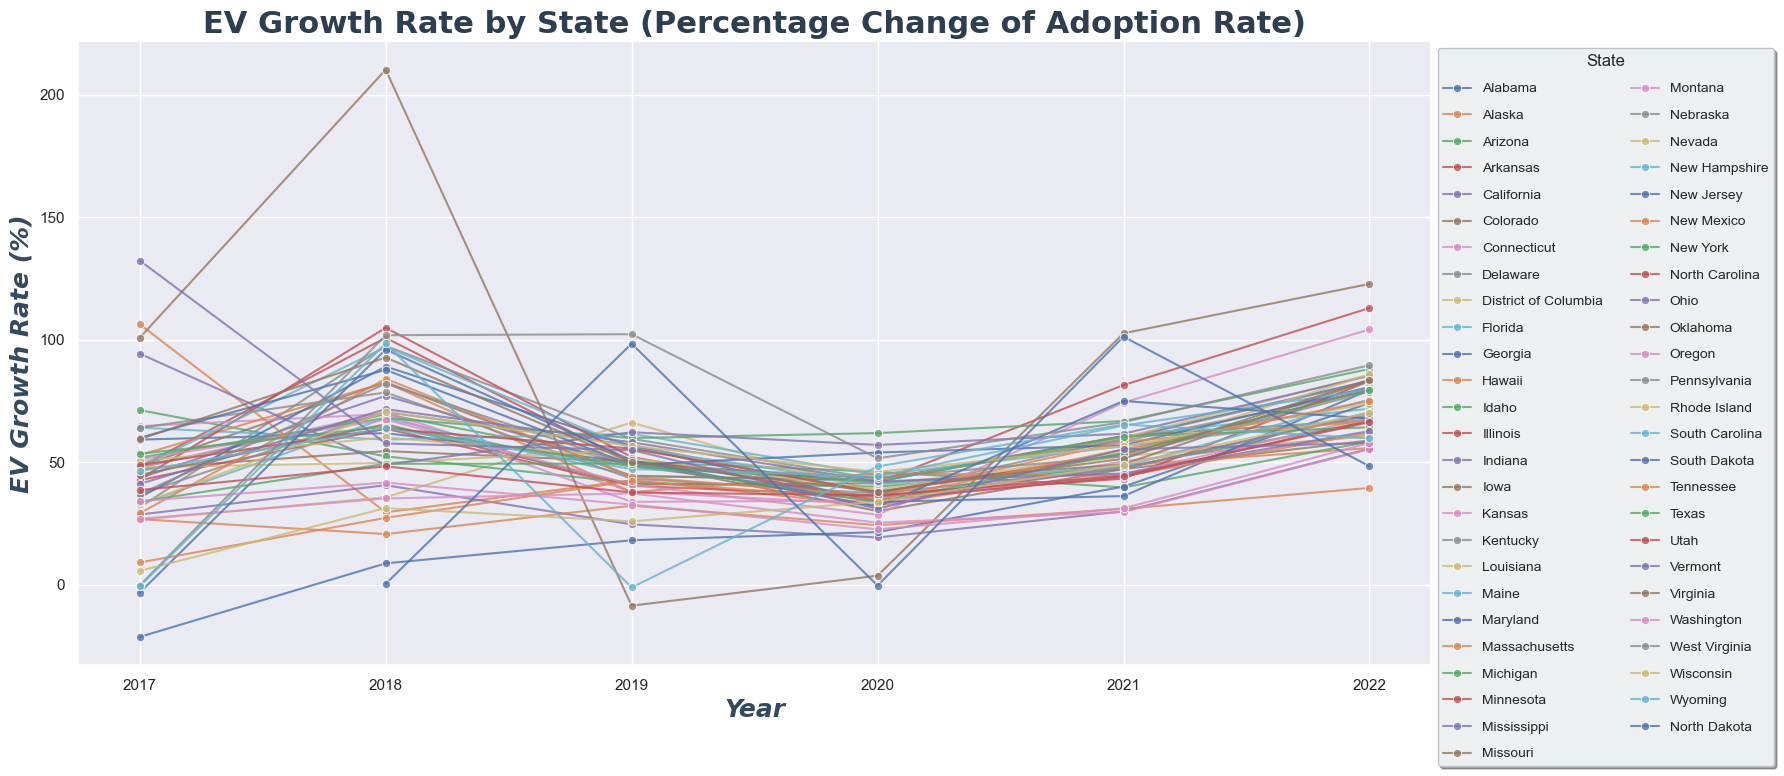

In [8]:
# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df,
    ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="state",
    title="EV Growth Rate by State (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="State",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ev_growth_rate_by_state.png"
file_path = Path(f"../../../../reports/figures/growth_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

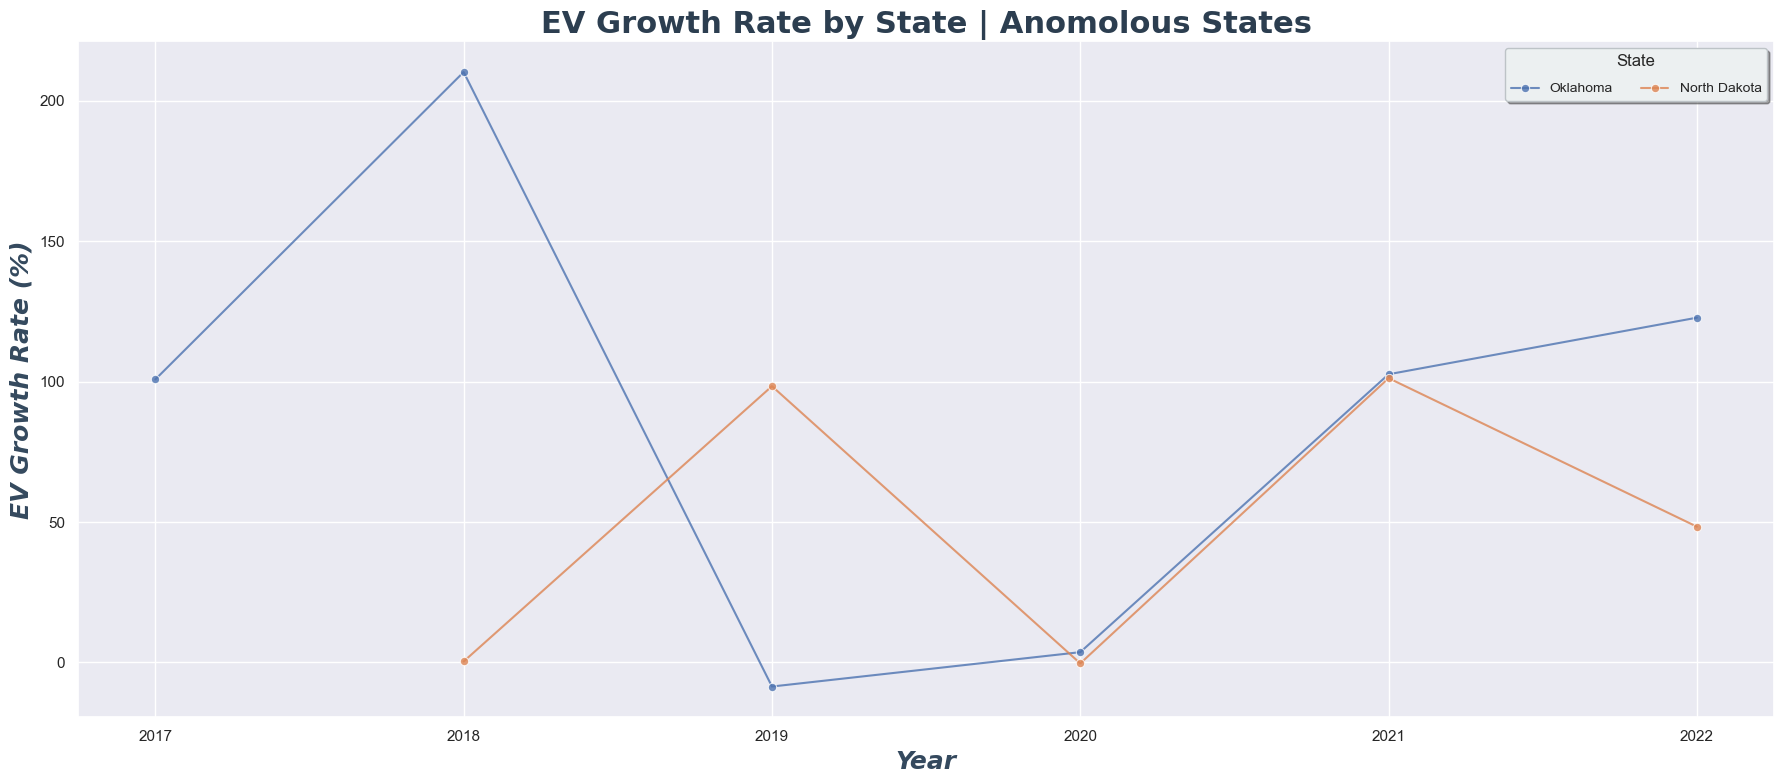

In [9]:
# Select SUSPECT states to plot
select_states = ["North Dakota", "Oklahoma"]

# Filter the data for the selected states
df_select_states = df[df["state"].isin(select_states)]

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df_select_states,
    ax, 
    x="year", 
    y="ev_growth_rate", 
    hue="state",
    title="EV Growth Rate by State | Anomolous States",
    x_label="Year",
    y_label="EV Growth Rate (%)",
    leg_title="State",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "ev_growth_rate_by_state_anomalous.png"
file_path = Path(f"../../../../reports/figures/growth_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

In [10]:
# Inspect for anomalies behavior using interactive hvplot
df.hvplot.line(
    x='year',
    y='gas_growth_rate',
    by='state',
    title='Gas Growth Rate by State (Percentage Change of Adoption Rate)',
    xlabel='Year',
    ylabel='Gas Growth Rate (%)',
    legend='top',
    fontscale=1.2,
    width=1500,
    height=650,
)

:NdOverlay   [state]
   :Curve   [year]   (gas_growth_rate)

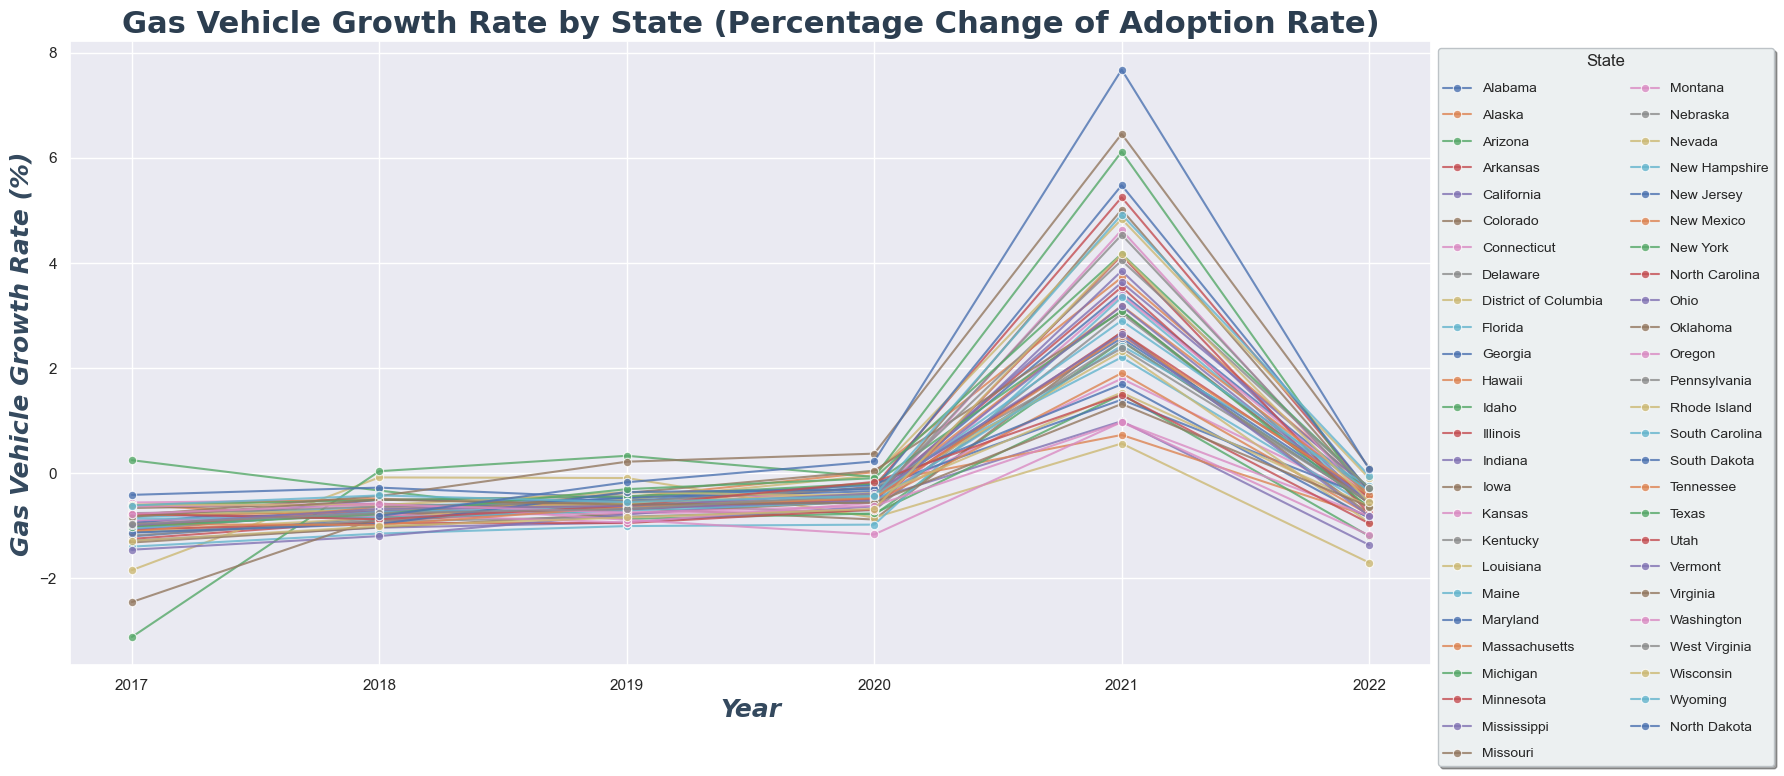

In [11]:
# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df,
    ax, 
    x="year", 
    y="gas_growth_rate", 
    hue="state",
    title="Gas Vehicle Growth Rate by State (Percentage Change of Adoption Rate)",
    x_label="Year",
    y_label="Gas Vehicle Growth Rate (%)",
    leg_title="State",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "gas_growth_rate_by_state.png"
file_path = Path(f"../../../../reports/figures/growth_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()

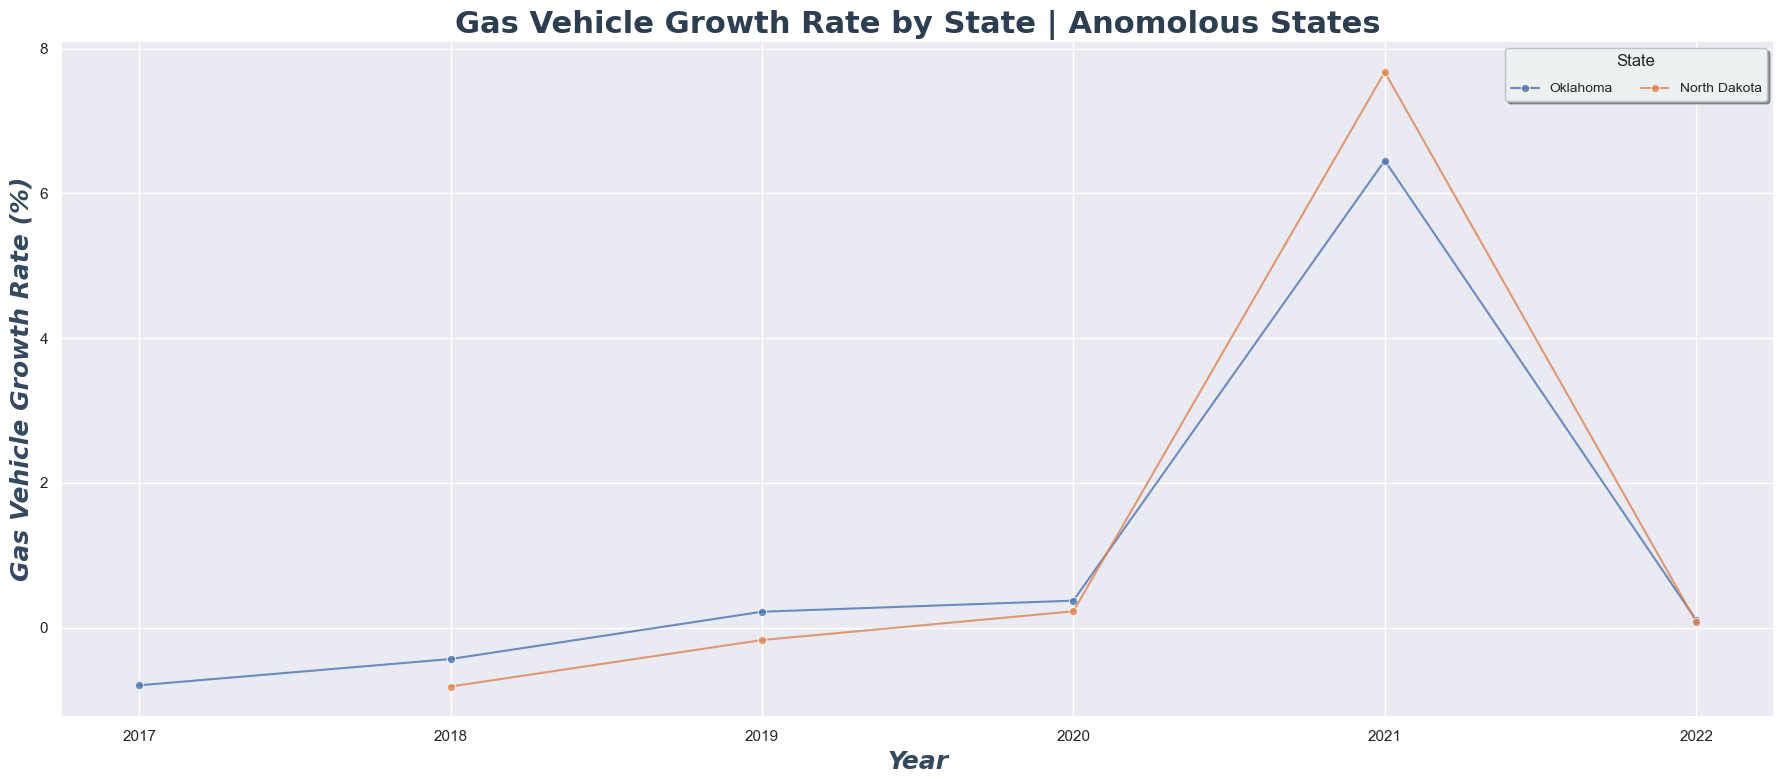

In [12]:
# Select SUSPECT states to plot
select_states = ["North Dakota", "Oklahoma"]

# Filter the data for the selected states
df_select_states = df[df["state"].isin(select_states)]

# Set the style using Seaborn
sns.set_theme(style="darkgrid", palette='deep')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(18, 8))

# Create the plot using our custom function
ax = custom_line_plot(
    df_select_states,
    ax, 
    x="year", 
    y="gas_growth_rate", 
    hue="state",
    title="Gas Vehicle Growth Rate by State | Anomolous States",
    x_label="Year",
    y_label="Gas Vehicle Growth Rate (%)",
    leg_title="State",
)

# Adjust the layout to make room for the legend
plt.tight_layout()

# Save the plot
file_name = "gas_growth_rate_by_state_anomalous.png"
file_path = Path(f"../../../../reports/figures/growth_rate_by_state/{file_name}")
plt.savefig(file_path, bbox_inches='tight')

# Display the plot
plt.show()